# Problem 1

## 1.a (\*)

Write a function that makes a mixture of three harmonically related sinusoids with frequencies $f$, $2f$, $3f$ with user provided amplitudes and phases.  Show a time domain plot of adding three sinusoids with amplitude $1.0$. $0.5$, $0.33$ corresponding respectively to $f$, $2f$, $3f$ all with 0 phases and another plot with random phases.  Using this function generate two seconds of audio in .wav format for a mixture with $f = 440 Hz$. Listen to the generated mixture using an audio editor like Audacity. Provide a figgure showing the spectrogram of your mixture using Audacity.

## 1.b (\*)

Generate 3 seconds of audio containing a mixture of two sine waves with frequencies $500 Hz$ and $502 Hz$. Listen to the generated sound. What do you hear? Try to explain what is happening.

## 1.c (\*)

Read about the concept of signal to noise ratio (SNR). Write a function that takes as input a SNR in decibels (dB) and a frequency in Hz in order to generate a mixture of white noise and a 440 sine wave. Generate 2 seconds of the corresponding audio and view/listen to it in Audacity.

## 1.d (\*\*)

Consider a mixture of 3 harmonically related sinusoids as the ones you created.  What you would like to devise is a process to estimate the amplitudes of each sine wave assuming that you know the frequencies that the mixture is composed of.  Try taking the inner product of a mixture with a unit amplitude sinusoid of frequency $f$, then take the inner product of the mixture with a unit amplitude sinusoid of frequency $2f$. Make sure that the phases of the "probing" sinusoid are the same as the phases of the mixture sinusoids.  What do you observe about the inner products ?  Describe how you could modify this procedure to estimate the amplitude of mixtures of 4 sinusoids mixed with noise.

## 1.e (\*\*\*)

Now let's make the scenario a little bit more challenging. We still know the frequencies of the mixture but we want to estimate not only the amplitudes but also the phases. Observe what happens with the inner products when the phase is not zero.  Plot the inner products of the input mixture for all possible phase shifts of the probing sinusoid. On that plot do you notice anything different about the "correct" phase ?  Based on your observation describe and also implement an algorithm for estimating both amplitudes and phases.  Show using one or more examples how it works.

In [1]:
%matplotlib inline
from pylab import *
import wave


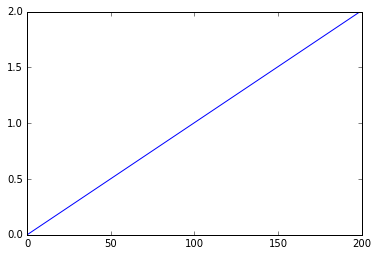

In [2]:
# create nSamples time samples 
samplingRate = 100;
numSamples = 200.0; 
numCycles = numSamples / samplingRate;
t = linspace(0, numCycles, numSamples);
plot(t);

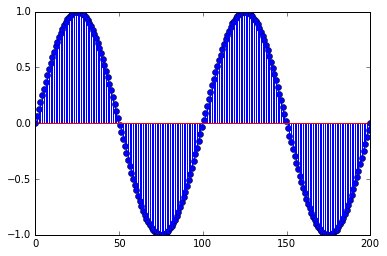

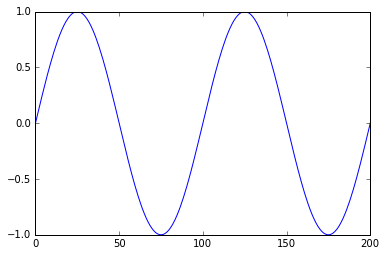

In [3]:
# slice the pizza into numSamples slices if numCycles is 1 
x = sin(2 * pi * t);
stem(t * samplingRate,x);
figure();
plot(t * samplingRate, x);

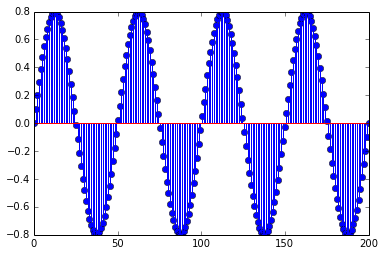

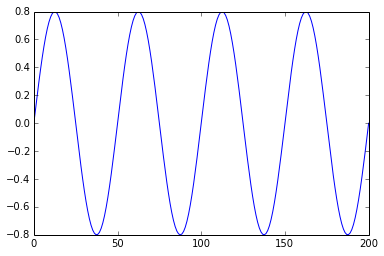

In [137]:
# let's adjust the sinusoid by amplitude and phase 
amplitude = 0.8;
phase = 0.0;
frequency = 2;
x = amplitude * sin(2 * pi * frequency * t + phase);
stem(t * samplingRate,x);
figure()
plot(t * samplingRate, x);


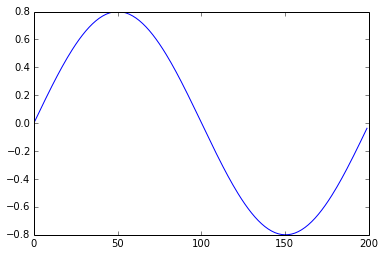

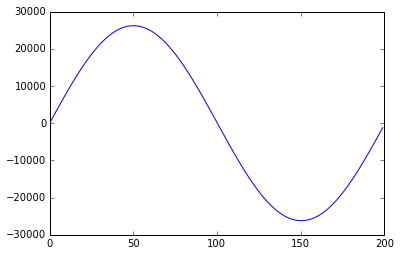

In [139]:
# let's create some audio 
samplingRate = 44100.0;
numSamples = 2 * 44100.0;
numCycles = numSamples / samplingRate;
# the time axis 
t = linspace(0, numCycles, numSamples);
frequency = 220;
amplitude = 0.8;
phase = 0.0;
x = amplitude * sin(2 * pi * frequency * t + phase);
figure()
plot(t[0:200] * samplingRate, x[0:200]);
maxVol=2**15-1.0 #maximum amplitude
x = x * maxVol 
figure()
plot(t[0:200] * samplingRate, x[0:200]);


In [140]:
f = wave.open('sinusoid_' + str(frequency) + 'Hz.wav', 'w');
f.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
f.writeframes(x.astype(int16).tostring())
f.close()
